<a href="https://colab.research.google.com/github/pranavi2013/2203a52118/blob/main/2203a52118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64
[[ 1.   1.1]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.2]
 [ 1.   3.7]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   5.1]
 [ 1.   5.3]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.8]
 [ 1.   7.1]
 [ 1.   7.9]
 [ 1.   8.2]
 [ 1.   8.7]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.   9.6]
 [ 1.  10.3]
 [ 1.  10.5]]


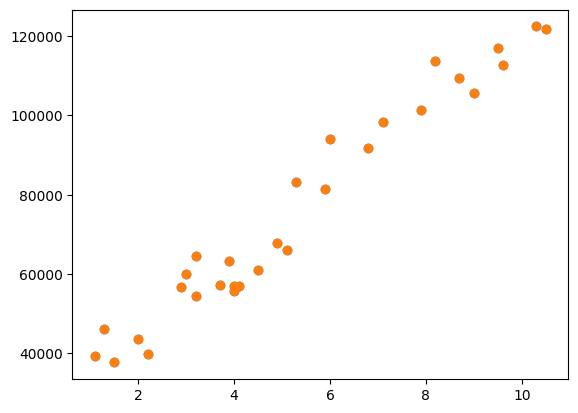

[25792.20019867  9449.96232146]

Predicted y values:
[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]

Best-fit line equation:
y = 9449.96 * x + 25792.20


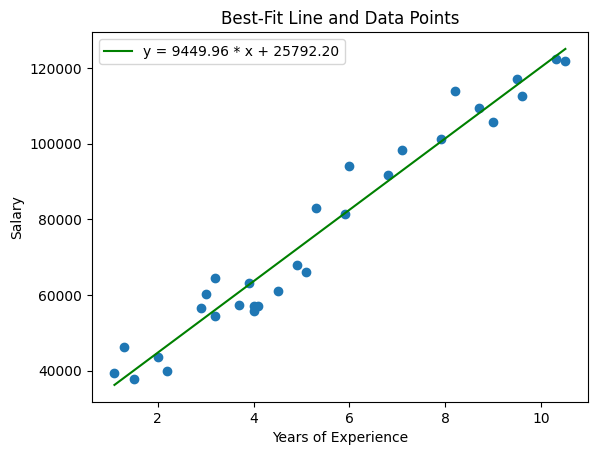

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
a = pd.read_csv('/content/Salary_Data.csv')
x=a["YearsExperience"]
y=a['Salary']
plt.scatter(x,y)
x_w = np.column_stack((np.ones(len(x)), x))
print(x)
print(x_w)
plt.scatter(x, y)
plt.show()
x_w_t = x_w.T
x_w_tintoy = np.dot(x_w_t, y)
x_wintox_w_t = np.dot(x_w_t, x_w)
x_wintox_w_t_inv = np.linalg.inv(x_wintox_w_t)
weights = np.dot(x_wintox_w_t_inv, x_w_tintoy)
print(weights)
y_p = np.dot(x_w, weights)
print("\nPredicted y values:")
print(y_p)
intercept = weights[0]
slope = weights[1]
print("\nBest-fit line equation:")
print(f"y = {slope:.2f} * x + {intercept:.2f}")
line_eq = f"y = {slope:.2f} * x + {intercept:.2f}"
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='green', label=line_eq)
plt.legend()
plt.scatter(x,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Best-Fit Line and Data Points')
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
a = pd.read_csv('/content/Japan_life_expectancy.csv')
features = a.drop("Life_expectancy", axis=1)
#print(features)
print('factors influence life expectancy in Japan are',features.columns)

factors influence life expectancy in Japan are Index(['Prefecture', 'Physician', 'Junior_col', 'University', 'Public_Hosp',
       'Pshic_hosp', 'Beds_psic', 'Nurses', 'Avg_hours', 'Salary',
       'Elementary_school', 'Sport_fac', 'Park', 'Forest', 'Income_per capita',
       'Density_pop', 'Hospitals', 'Beds', 'Ambulances', 'Health_exp',
       'Educ_exp', 'Welfare_exp'],
      dtype='object')
